C:\Users\Administrator\AppData\Local\Temp\ipykernel_17092\1576658695.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[**********************71%*********              ]  5 of 7 completed

[*********************100%***********************]  7 of 7 completed



--- FINAL METRICS (Including ORHD & MASR) ---
        Total Return Volatility Sharpe Ratio
Ticker                                      
PHDC.CA       28.90%     38.14%         0.03
TMGH.CA       32.23%     35.22%         0.02
MASR.CA       19.37%     43.50%         0.01
EMFD.CA        8.77%     32.41%        -0.21
HELI.CA        3.67%     46.27%        -0.07
ORHD.CA        4.46%     45.35%        -0.07
OCDI.CA       24.22%     38.23%        -0.00

Displaying Plot...


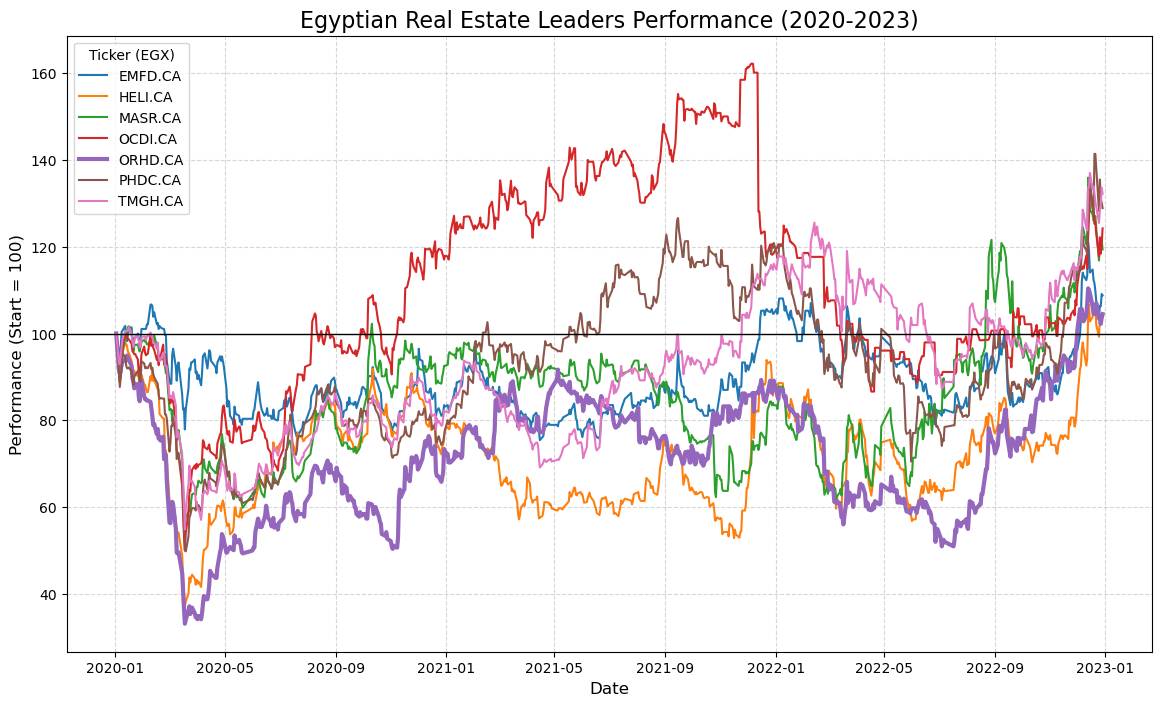

In [2]:
# ---------------------------------------------------------
# PROJECT: Egyptian Real Estate Sector Analysis (Including Top Caps)
# AUTHOR: Fares Zidan
# ---------------------------------------------------------

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. CONFIGURATION
# ضفنا ORHD (أوراسكوم) و MASR (مدينة مصر) للقائمة
tickers = ['TMGH.CA', 'EMFD.CA', 'PHDC.CA', 'OCDI.CA', 'HELI.CA', 'ORHD.CA', 'MASR.CA']

start_date = '2020-01-01'
end_date = '2023-01-01'

# 2. DATA INGESTION
print(f"Downloading data for {len(tickers)} companies...")
try:
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    if data.empty:
        print("Error: No data fetched.")
        exit()
        
    # Drop columns with missing data
    data = data.dropna(axis=1, how='all')
    
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# 3. DATA PROCESSING (Normalization)
# Rebase to 100 (Start point for everyone is 100)
normalized_data = (data / data.iloc[0]) * 100

# 4. QUANTITATIVE ANALYSIS
daily_returns = data.pct_change().dropna()

# Annualized Metrics
annual_return = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * np.sqrt(252)

# Sharpe Ratio (Using 15% Risk Free Rate)
risk_free_rate = 0.15 
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

# Create Summary Table
metrics_df = pd.DataFrame({
    'Total Return': (data.iloc[-1] / data.iloc[0] - 1),
    'Volatility': annual_volatility,
    'Sharpe Ratio': sharpe_ratio
})

# Formatting
metrics_df['Total Return'] = metrics_df['Total Return'].map("{:.2%}".format)
metrics_df['Volatility'] = metrics_df['Volatility'].map("{:.2%}".format)
metrics_df['Sharpe Ratio'] = metrics_df['Sharpe Ratio'].map("{:.2f}".format)

# 5. VISUALIZATION
plt.figure(figsize=(14, 8))

# Loop to plot all lines
for ticker in normalized_data.columns:
    # تمييز أوراسكوم بخط سميك شوية عشان تلاحظه
    linewidth = 3 if 'ORHD' in ticker else 1.5 
    plt.plot(normalized_data.index, normalized_data[ticker], label=ticker, linewidth=linewidth)

plt.title('Egyptian Real Estate Leaders Performance (2020-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Performance (Start = 100)', fontsize=12)
plt.legend(title='Ticker (EGX)', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(100, color='black', linewidth=1)

# 6. OUTPUT
print("\n--- FINAL METRICS (Including ORHD & MASR) ---")
print(metrics_df.sort_values(by='Sharpe Ratio', ascending=False)) # ترتيب حسب الأفضل
print("\nDisplaying Plot...")
plt.show()